In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('competition_project/cross_sell_train.csv')
test=pd.read_csv('competition_project/cross_sell_test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
print ('Number of data points : ', train.shape[0], \
       'Number of features/variables:', train.shape[1])

Number of data points :  381109 Number of features/variables: 12


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
print("no of duplicates in train is: {}".format(sum(train.duplicated())))
print("no of duplicates in test is: {}".format(sum(test.duplicated())))

no of duplicates in train is: 0
no of duplicates in test is: 0


In [8]:
print("We have {} NaN/Null values in train dataset".format(train.isnull().values.sum()))
print("We have {} NaN/Null values in test dataset".format(test.isnull().values.sum()))

We have 0 NaN/Null values in train dataset
We have 0 NaN/Null values in test dataset


In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [10]:
data=train.copy()

In [11]:
#find numerical and categorical datatype
categorical=[]
numerical=[]
for col in train.columns:
    if train[col].dtype==object:
        categorical.append(col)
    else:
        numerical.append(col)

In [12]:
train[numerical].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


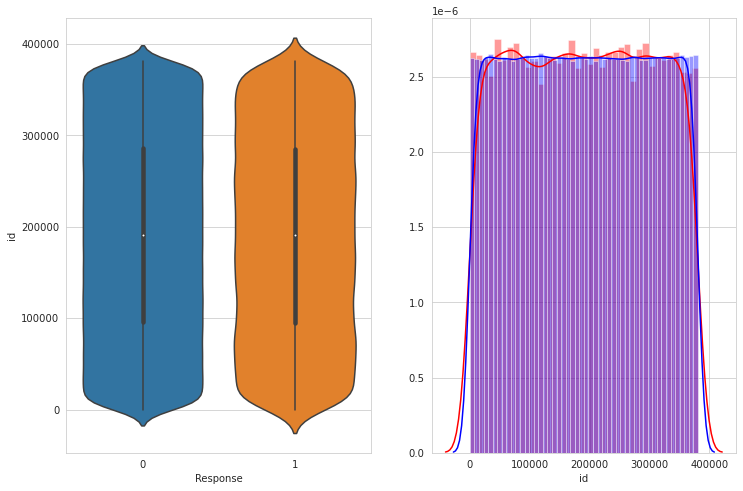

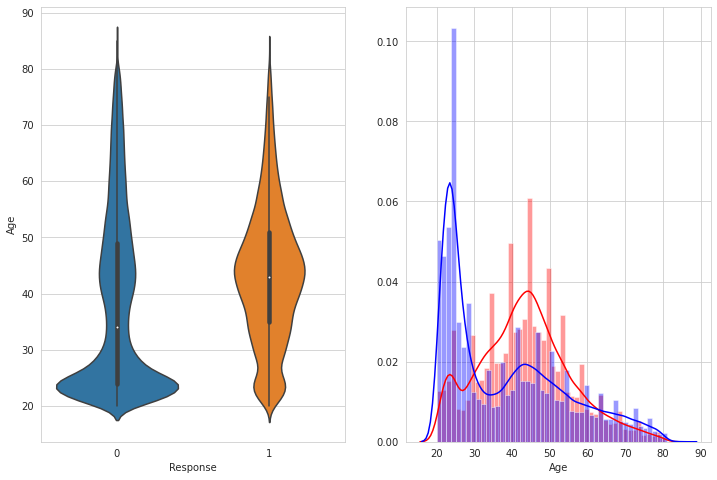

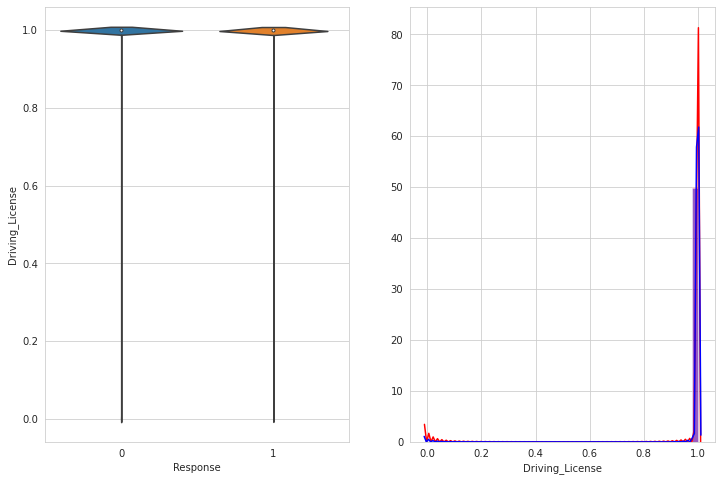

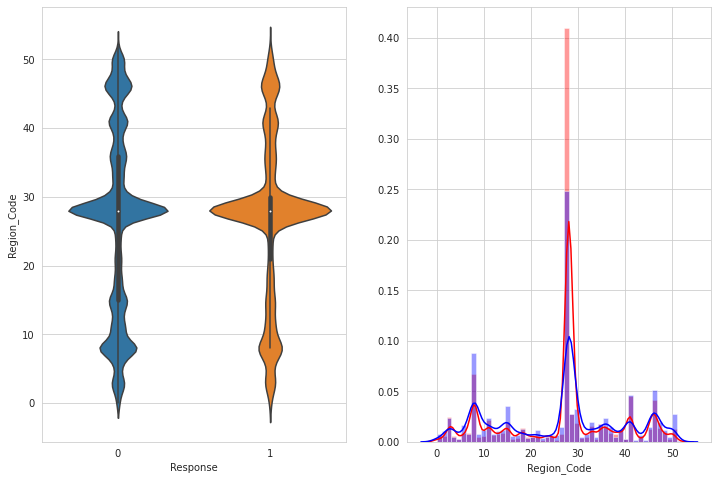

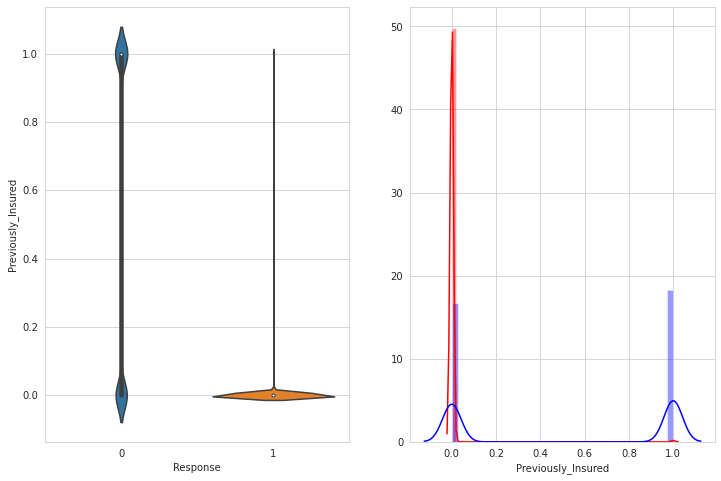

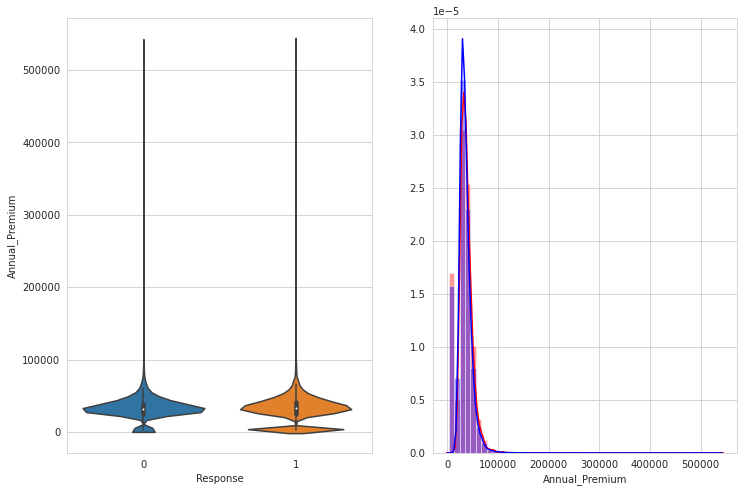

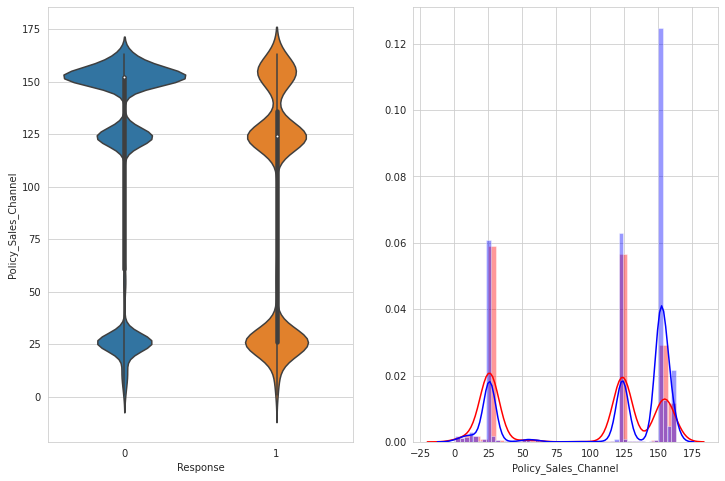

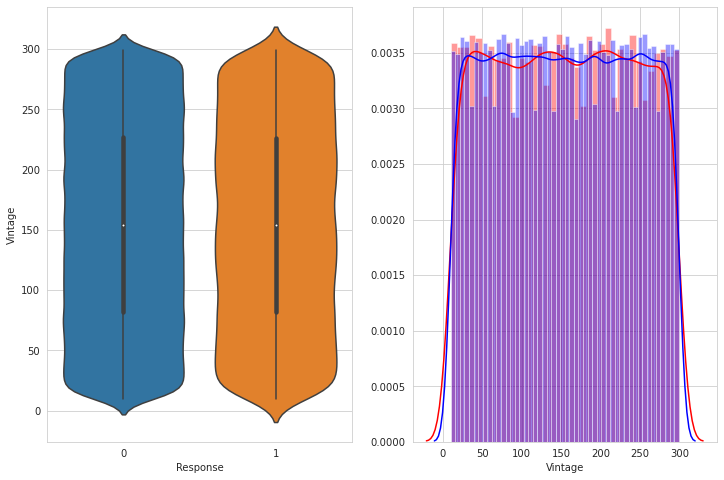

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


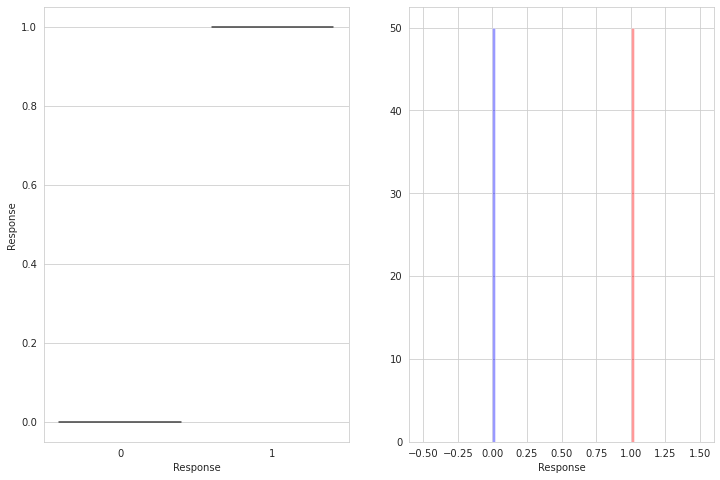

In [13]:
for col in numerical:
    plt.figure(figsize=(12, 8))

    plt.subplot(1,2,1)
    sns.violinplot(x = 'Response', y = col, data = data)

    plt.subplot(1,2,2)
    sns.distplot(data[data['Response'] == 1][col] , color = 'red')
    sns.distplot(data[data['Response'] == 0][col]  , color = 'blue' )
    plt.show()

In [14]:
categorical

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

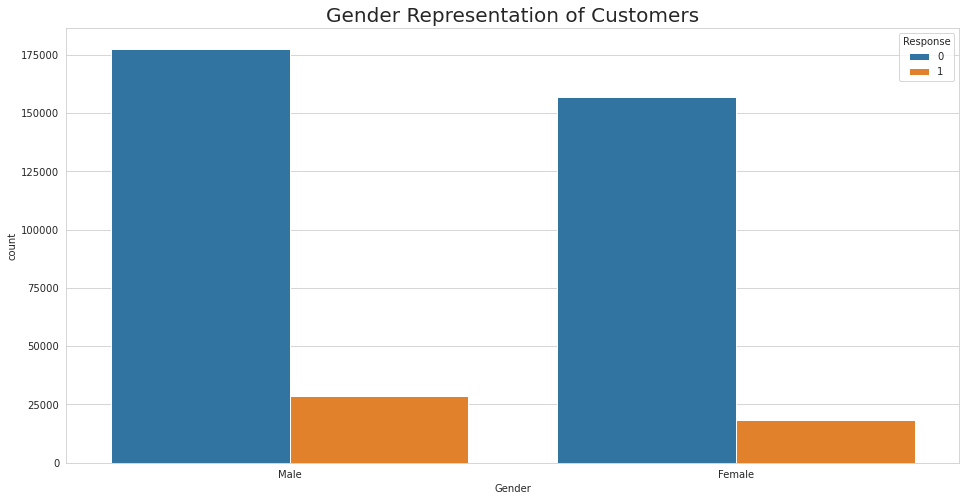

In [15]:
plt.figure(figsize=(16,8))
plt.title('Gender Representation of Customers', fontsize=20)
sns.countplot(x="Gender",data=train,hue="Response")
plt.show()

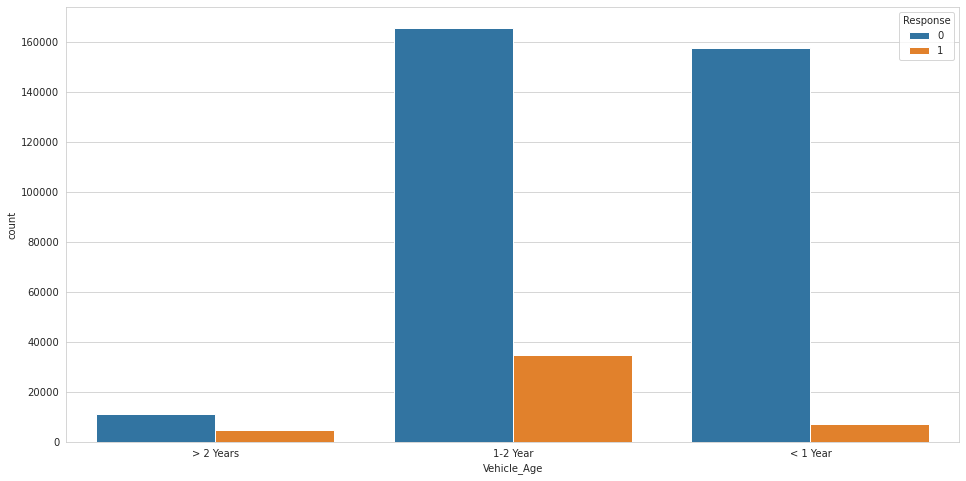

In [16]:
plt.figure(figsize=(16,8))
#plt.title('State Representation of Customers', fontsize=20)
sns.countplot(x="Vehicle_Age",data=train,hue="Response")
plt.show()

In [17]:
train.groupby(["Vehicle_Age"])["Vintage"].count()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vintage, dtype: int64

In [18]:
train.groupby(["Vehicle_Age"])["Vintage"].count()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vintage, dtype: int64

In [19]:
map1={"1-2 Year":1,"< 1 Year":0,"> 2 Years":2}
map2={"Yes":1,"No":0}

In [20]:
#map2={"1-2 Year":1,"< 1 Year":0,"> 2 Years":2}

In [21]:
train["Vehicle_Age"]=train["Vehicle_Age"].map(map1)

In [22]:
test["Vehicle_Age"]=test["Vehicle_Age"].map(map1)

In [23]:
train["Vehicle_Damage"]=train["Vehicle_Damage"].map(map2)

test["Vehicle_Damage"]=test["Vehicle_Damage"].map(map2)

In [24]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [25]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,0,0,59097.0,152.0,297


In [26]:
train.drop("id",axis=1,inplace=True)
test.drop("id",axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label=LabelEncoder()
one_hot=OneHotEncoder()

In [28]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,Male,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,Female,29,1,41.0,1,0,0,27496.0,152.0,39,0


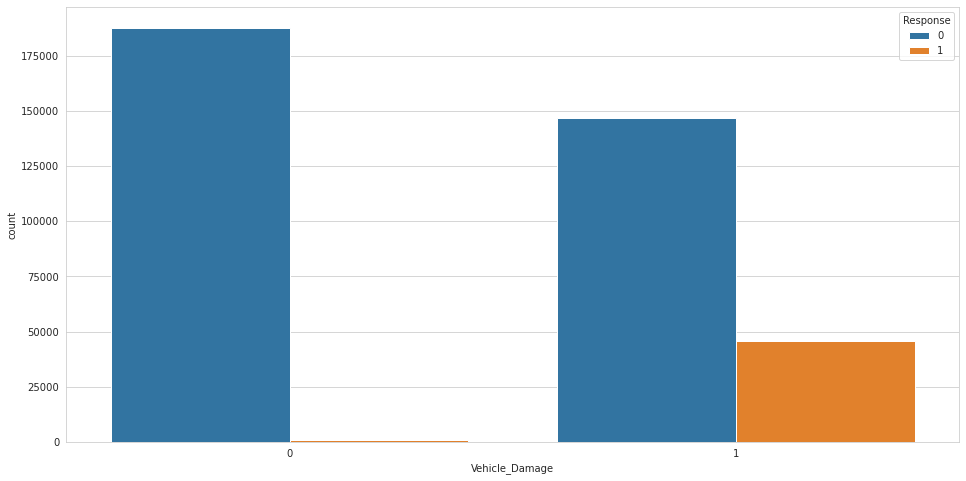

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x="Vehicle_Damage",data=train,hue="Response")
plt.show()

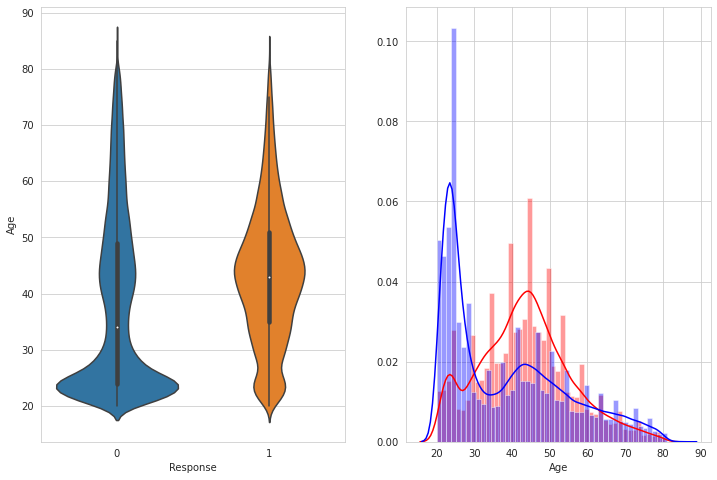

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Response', y = 'Age', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Response'] == 1]['Age'] , color = 'red')
sns.distplot(data[data['Response'] == 0]['Age']  , color = 'blue' )
plt.show()

In [31]:
#Feature enginnering(binning) of age column 
def age_cat(col):
    if col<30:
        return -1
    elif col<60:
        return 1
    elif col>=60:
        return 0

In [32]:
train["age_cat"]=train["Age"].apply(age_cat)

In [33]:
test["age_cat"]=test["Age"].apply(age_cat)

In [34]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_cat
0,Male,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,Male,76,1,3.0,0,1,0,33536.0,26.0,183,0,0
2,Male,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,Male,21,1,11.0,1,0,0,28619.0,152.0,203,0,-1
4,Female,29,1,41.0,1,0,0,27496.0,152.0,39,0,-1


In [35]:
#transform age feature
train["log_Age"]=np.log(train["Age"])

In [36]:
test["log_Age"]=np.log(test["Age"])

In [37]:
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})

In [38]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_cat,log_Age
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1,3.784190
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0,0,4.330733
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1,3.850148
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0,-1,3.044522
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0,-1,3.367296


In [39]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,age_cat,log_Age
0,1,25,1,11.0,1,0,0,35786.0,152.0,53,-1,3.218876
1,1,40,1,28.0,0,1,1,33762.0,7.0,111,1,3.688879
2,1,47,1,28.0,0,1,1,40050.0,124.0,199,1,3.850148
3,1,24,1,27.0,1,0,1,37356.0,152.0,187,-1,3.178054
4,1,27,1,28.0,1,0,0,59097.0,152.0,297,-1,3.295837


NameError: name 'k' is not defined

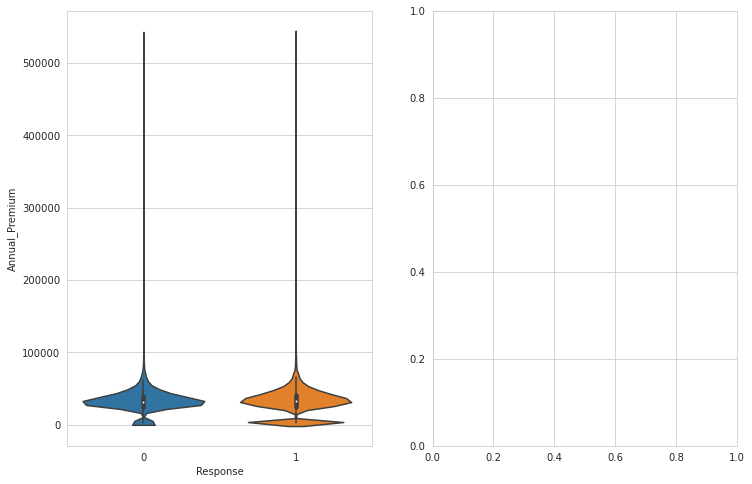

In [41]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Response', y = 'Annual_Premium', data = train)

plt.subplot(1,2,2)
sns.distplot(k[k['Response'] == 1]['Annual_Premium'] , color = 'red')
sns.distplot(k[k['Response'] == 0]['Annual_Premium']  , color = 'blue' )
plt.show()

In [42]:

Q1=np.percentile(train["Annual_Premium"],25)
Q3=np.percentile(train["Annual_Premium"],75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

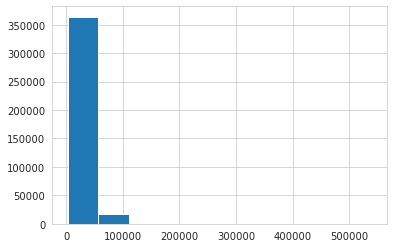

In [43]:
train["Annual_Premium"].hist()

In [44]:
lower_limit,upper_limit

(1912.5, 61892.5)

In [45]:
train=train[(train["Annual_Premium"]>lower_limit) & (train["Annual_Premium"]<upper_limit)]

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


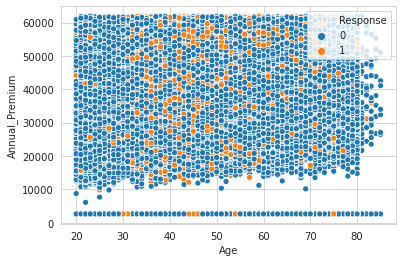

In [46]:
sns.scatterplot(x="Age",y="Annual_Premium",data=train,hue="Response")

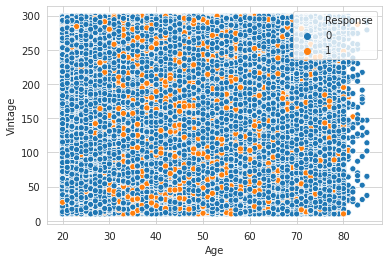

In [47]:
sns.scatterplot(x="Age",y="Vintage",data=train,hue="Response")

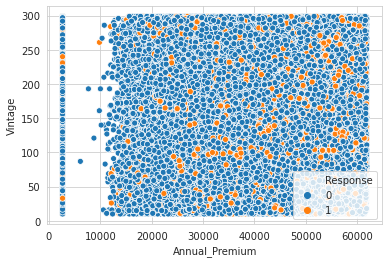

In [48]:
sns.scatterplot(x="Annual_Premium",y="Vintage",data=train,hue="Response")

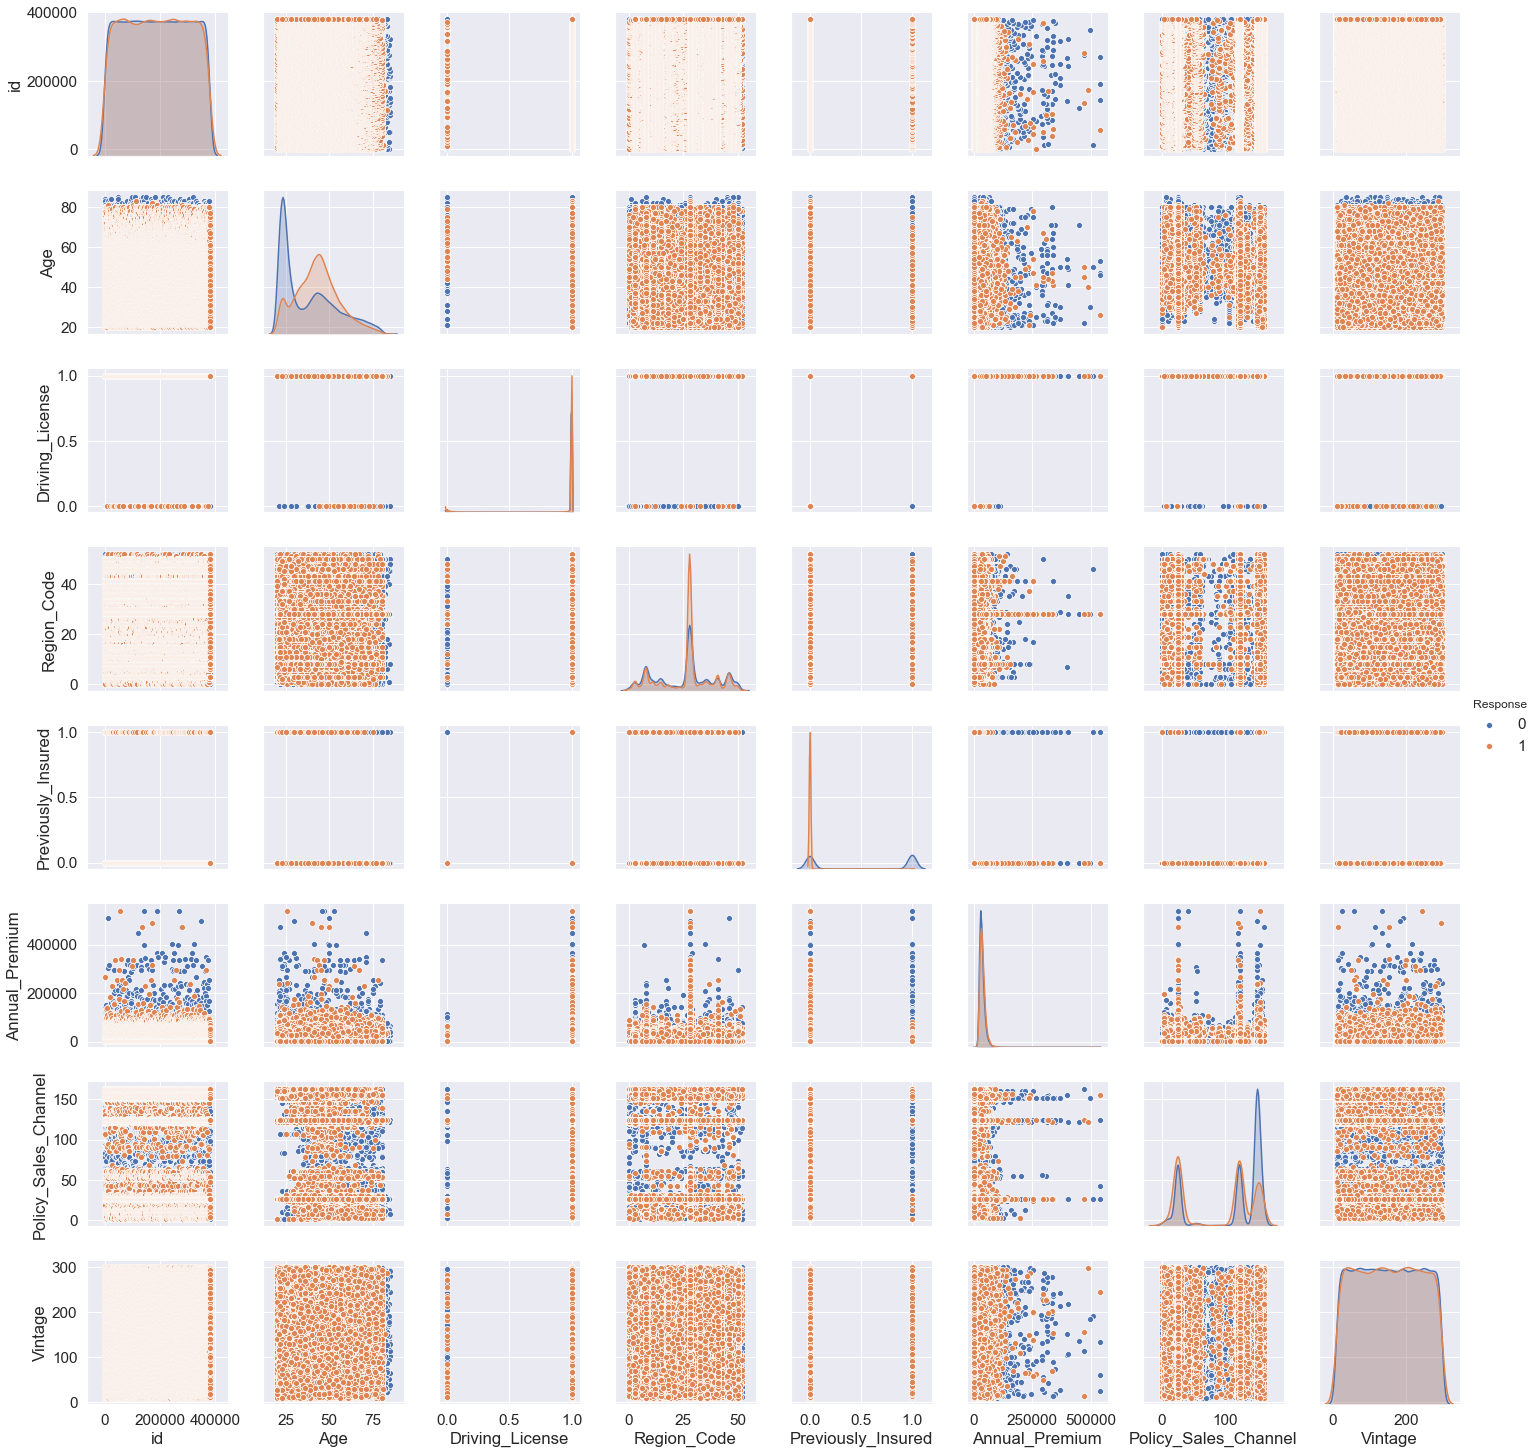

In [49]:
sns.pairplot(train[numerical],hue='Response')

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


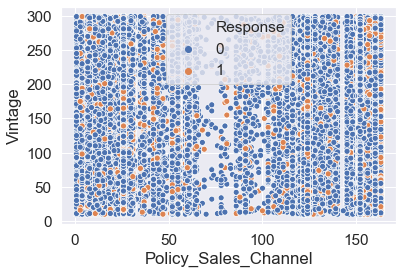

In [57]:
sns.scatterplot(x="Policy_Sales_Channel",y="Vintage",data=train,hue="Response")

### Feature Engineering

In [49]:
from sklearn.preprocessing import KBinsDiscretizer
categorized = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile')

train['Premium_Bins'] =categorized.fit_transform(train['Annual_Premium'].values.reshape(-1,1)).astype(int)

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [51]:
test['Premium_Bins'] =categorized.transform(test['Annual_Premium'].values.reshape(-1,1)).astype(int)

In [52]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,age_cat,log_Age,Premium_Bins
0,1,25,1,11.0,1,0,0,35786.0,152.0,53,-1,3.218876,4
1,1,40,1,28.0,0,1,1,33762.0,7.0,111,1,3.688879,3
2,1,47,1,28.0,0,1,1,40050.0,124.0,199,1,3.850148,5
3,1,24,1,27.0,1,0,1,37356.0,152.0,187,-1,3.178054,4
4,1,27,1,28.0,1,0,0,59097.0,152.0,297,-1,3.295837,6


In [53]:
#### mean encoding of region code

In [54]:
import pandas as pd
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values

def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=4, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values


def mean_target_encoding(train, test, target, categorical, alpha=5):
  
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature

In [55]:

train_feature,test_feature=mean_target_encoding(train,test,"Response","Region_Code")

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [56]:
train["code_encoding"]=train_feature
test["code_encoding"]=test_feature

In [57]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'age_cat', 'log_Age',
       'Premium_Bins', 'code_encoding'],
      dtype='object')

In [58]:
test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'age_cat', 'log_Age', 'Premium_Bins',
       'code_encoding'],
      dtype='object')

In [61]:
def binning(val):
    if val<=122:
        return 1
    elif val<=245:
        return 2
    else:
        return 3
train["Quarter"]=train["Vintage"].apply(binning)

test["Quarter"]=test["Vintage"].apply(binning)    

In [59]:
train.drop(["Region_Code","Age"],axis=1,inplace=True)
test.drop(["Age","Region_Code"],axis=1,inplace=True)

#test.drop("vehicle_age_prob",axis=1,inplace=True)

In [62]:
# changing data type because cat_feature in catboost cannot be float
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

train['Vehicle_Age']=train['Vehicle_Age'].astype(int)
test['Vehicle_Age']=test['Vehicle_Age'].astype(int)

In [63]:
df1=train.copy()
df2=test.copy()

In [64]:
train.shape,test.shape

((370789, 14), (127037, 13))

In [65]:
X=train.drop("Response",axis=1)
y=train["Response"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=42,shuffle=True)

In [66]:
train.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_cat,log_Age,Premium_Bins,code_encoding,Quarter
0,1,1,0,2,1,40454.0,26,217,1,1,3.784190,5,0.187386,2
1,1,1,0,1,0,33536.0,26,183,0,0,4.330733,3,0.126738,2
2,1,1,0,2,1,38294.0,26,27,1,1,3.850148,4,0.188257,1
3,1,1,1,0,0,28619.0,152,203,0,-1,3.044522,2,0.115165,2
4,0,1,1,0,0,27496.0,152,39,0,-1,3.367296,1,0.122650,1


In [67]:
from sklearn.metrics import roc_auc_score

In [70]:
def feature_importance(model, X_train):

    fI = model.feature_importances_
    
    
    names = X_train.columns.values
    
    ticks = [i for i in range(len(names))]
    
    plt.bar(ticks, fI)
    
    plt.xticks(ticks, names,rotation = 90)
    
    plt.show()

In [68]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)
lgbcl= lgbcl.fit(X_train, y_train,eval_metric='auc',verbose=2)
y_lgb = lgbcl.predict(X_test)
probs_tr = lgbcl.predict_proba(X_train)[:, 1]
probs_te = lgbcl.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_train, probs_tr))
print(roc_auc_score(y_test, probs_te))

[LightGBM] [Warning] Unknown parameter: depth
0.8688024905569218
0.858138208180602


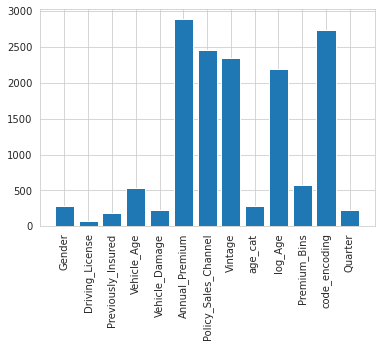

In [71]:
feature_importance(lgbcl,X_train)

In [110]:
sample_submmission=pd.read_csv("sample_submission_cross_sell.csv")
lgb_pred= lgbcl.predict_proba(test)[:, 1]
sample_submmission['Response']=lgb_pred

In [112]:
sample_submmission.to_csv("lgb.csv", index = False)

### CatBoost

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333710 entries, 324285 to 124503
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                333710 non-null  int64  
 1   Driving_License       333710 non-null  int64  
 2   Previously_Insured    333710 non-null  int64  
 3   Vehicle_Age           333710 non-null  int32  
 4   Vehicle_Damage        333710 non-null  int64  
 5   Annual_Premium        333710 non-null  float64
 6   Policy_Sales_Channel  333710 non-null  int32  
 7   Vintage               333710 non-null  int64  
 8   age_cat               333710 non-null  int64  
 9   log_Age               333710 non-null  float64
 10  Premium_Bins          333710 non-null  int32  
 11  code_encoding         333710 non-null  float64
 12  Quarter               333710 non-null  int64  
dtypes: float64(3), int32(3), int64(7)
memory usage: 31.8 MB


In [74]:
X_train.columns


Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'age_cat', 'log_Age', 'Premium_Bins', 'code_encoding', 'Quarter'],
      dtype='object')

In [77]:
cat_col=['Gender','Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel','age_cat','Quarter','Premium_Bins']

In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catb = CatBoostClassifier(l2_leaf_reg=3,iterations=500,learning_rate=0.01,depth=7)
catb= catb.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test,y_test),plot=True,early_stopping_rounds=30,verbose=100)
y_cat = catb.predict(X_test)
probs_cat_train = catb.predict_proba(X_train)[:, 1]
probs_cat_test = catb.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_train, probs_cat_train))
print(roc_auc_score(y_test, probs_cat_test))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6731577	test: 0.6732489	best: 0.6732489 (0)	total: 1.2s	remaining: 9m 59s
100:	learn: 0.2837420	test: 0.2853758	best: 0.2853758 (100)	total: 52.9s	remaining: 3m 29s
200:	learn: 0.2686268	test: 0.2695797	best: 0.2695797 (200)	total: 1m 49s	remaining: 2m 43s
300:	learn: 0.2655328	test: 0.2663228	best: 0.2663228 (300)	total: 2m 52s	remaining: 1m 54s
400:	learn: 0.2644098	test: 0.2652802	best: 0.2652802 (400)	total: 3m 55s	remaining: 58.1s
499:	learn: 0.2637356	test: 0.2647228	best: 0.2647228 (499)	total: 5m 4s	remaining: 0us

bestTest = 0.2647228461
bestIteration = 499

0.8584257260335509
0.8559982023808478


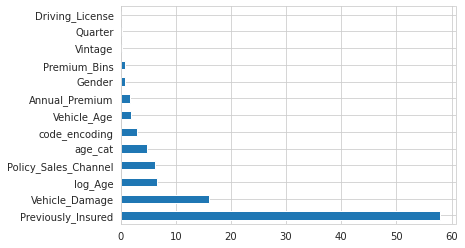

In [80]:
feat_importances = pd.Series(catb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
#feat_importances.nsmallest(20).plot(kind='barh')
plt.show()

In [90]:
col_1=['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage','age_cat', 'log_Age','Q']

In [81]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate =0.005,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=5,
 subsample=1,
 colsample_bytree=0.8,
 objective= 'reg:linear',
    random_state=42)

In [82]:
model= model.fit(X_train, y_train,eval_metric='auc',verbose=2)
y_lgb = model.predict(X_test)
probs_tr = model.predict_proba(X_train)[:, 1]
probs_te = model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_train, probs_tr))
print(roc_auc_score(y_test, probs_te))

[11:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
0.8756324247741445
0.8574937600688856


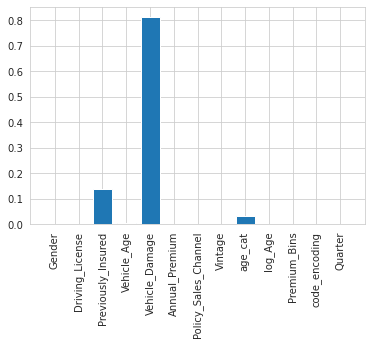

In [83]:
feature_importance(model,X_train)